In [3]:
# Insight Analysis: Drivers, Pain Points and Recommendations
import pandas as pd
from collections import Counter

In [5]:
# Load annotated dataset
df = pd.read_csv('../data/processed/reviews_with_sentiment_themes.csv')

In [6]:
# prepare storage for insights
bank_insights = {}

In [9]:
for bank_name in df["bank"].unique():
    bank = df[df["bank"] == bank_name]

    # Drivers: positive reviews by theme
    positive_reviews = bank[bank["sentiment_label"] == "positive"]
    driver_counts = positive_reviews["theme_label"].value_counts()
    top_drivers = driver_counts.head(2).to_dict()

    # Pain Points: negative reviews by theme
    negative_reviews = bank[bank["sentiment_label"] == "negative"]
    pain_point_counts = negative_reviews["theme_label"].value_counts()
    top_pain_points = pain_point_counts.head(2).to_dict()

    # Recommendations based on pain points
    recommendations = []
    for theme in top_pain_points.keys():
        if theme == "Account Access Issues":
            recommendations.append("Improve Login and authentication flow")
        elif theme == "Transactional Performance":
            recommendations.append("Optimize transaction speed and reduce lag")
        elif theme == "User Interface & Experience":
            recommendations.append("Redesign the app interface for better usability")
        elif theme == "Customer Support":
            recommendations.append("Enhance customer support training and response times.")
        elif theme == "Feature Requests":
            recommendations.append("Prioritize development of requested features")
        else:
            recommendations.append(f"Investigate and address issues related to {theme}")
    
    # store insights for each bank (use bank_name as the dict key, not the DataFrame)
    bank_insights[bank_name] = {
        "top_drivers": top_drivers,
        "top_pain_points": top_pain_points,
        "recommendations": recommendations,
    }

In [10]:
# Display insights
for bank, insights in bank_insights.items():
    print(f"\n=== {bank} ===")
    print("Top Drivers:")
    for theme, count in insights['top_drivers'].items():
        print(f"  - {theme}: {count} positive reviews")
    print("Top Pain Points:")
    for theme, count in insights['top_pain_points'].items():
        print(f"  - {theme}: {count} negative reviews")
    print("Recommendations:")
    for rec in insights['recommendations']:
        print(f"  - {rec}")


=== CBE ===
Top Drivers:
  - Other: 162 positive reviews
Top Pain Points:
  - Other: 30 negative reviews
Recommendations:
  - Investigate and address issues related to Other

=== BOA ===
Top Drivers:
  - Other: 134 positive reviews
Top Pain Points:
  - Other: 76 negative reviews
Recommendations:
  - Investigate and address issues related to Other

=== DASHEN ===
Top Drivers:
  - Other: 120 positive reviews
  - Transaction Performance: 55 positive reviews
Top Pain Points:
  - Other: 32 negative reviews
  - Transaction Performance: 20 negative reviews
Recommendations:
  - Investigate and address issues related to Other
  - Investigate and address issues related to Transaction Performance


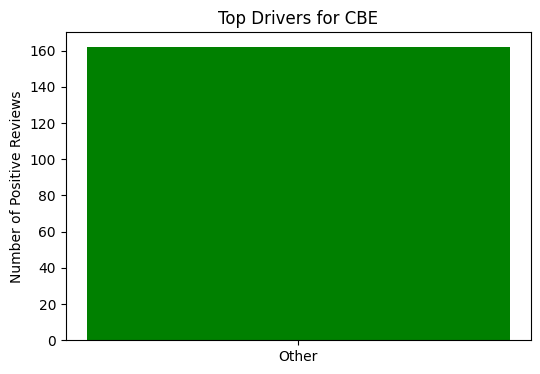

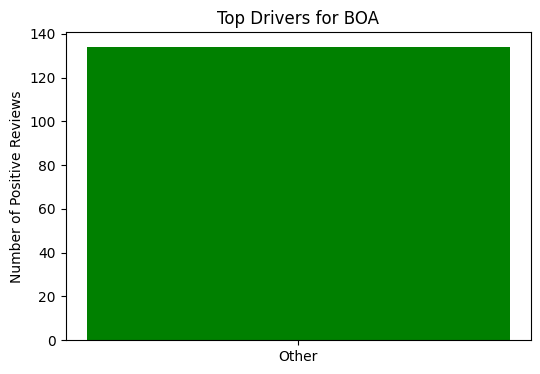

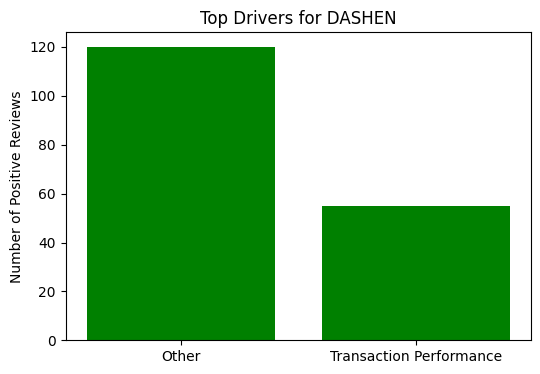

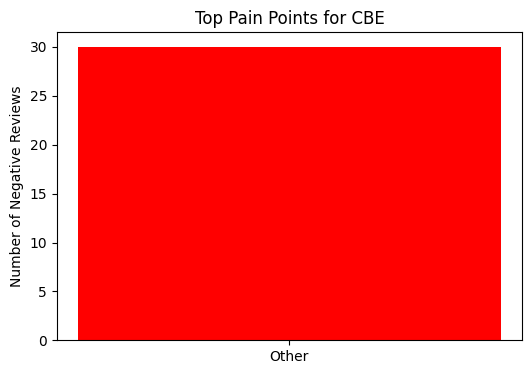

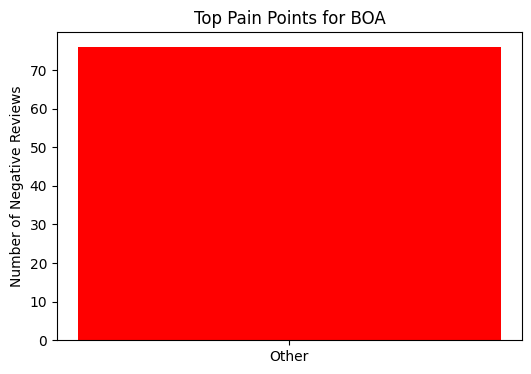

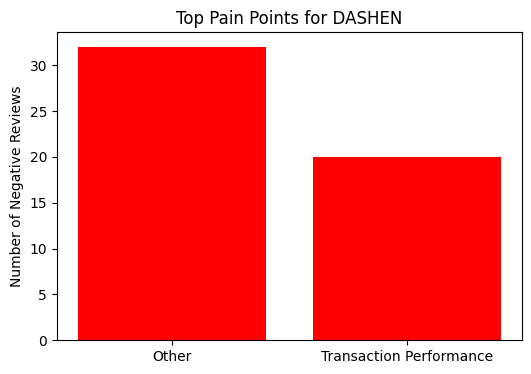

In [11]:
import matplotlib.pyplot as plt

# Example: Top drivers per bank (bar chart)
for bank in df['bank'].unique():
    drivers = bank_insights[bank]['top_drivers']
    if not drivers:
        continue
    plt.figure(figsize=(6,4))
    plt.bar(drivers.keys(), drivers.values(), color='green')
    plt.title(f"Top Drivers for {bank}")
    plt.ylabel("Number of Positive Reviews")
    plt.show()

# Example: Top pain points per bank (bar chart)
for bank in df['bank'].unique():
    pain_points = bank_insights[bank]['top_pain_points']
    if not pain_points:
        continue
    plt.figure(figsize=(6,4))
    plt.bar(pain_points.keys(), pain_points.values(), color='red')
    plt.title(f"Top Pain Points for {bank}")
    plt.ylabel("Number of Negative Reviews")
    plt.show()


In [13]:
insights_list = []
for bank, info in bank_insights.items():
    for theme, count in info['top_drivers'].items():
        insights_list.append([bank, "Driver", theme, count])
    for theme, count in info['top_pain_points'].items():
        insights_list.append([bank, "Pain Point", theme, count])
insights_df = pd.DataFrame(insights_list, columns=["Bank", "Type", "Theme", "Count"])
insights_df.to_csv("../data/processed/bank_insights.csv", index=False)
